In [2]:
import matplotlib.pyplot as plt
import os,csv
import zipfile
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import glob, keras
import numpy as np
import pandas as pd
%matplotlib inline
from keras.utils import np_utils
from keras import regularizers
from keras.models import Sequential,load_model
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.layers import Dense, Dropout

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [85]:
data = pd.read_csv('student-mat.csv')
data.shape

(395, 33)

In [86]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [87]:
#change from data to dataframe
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


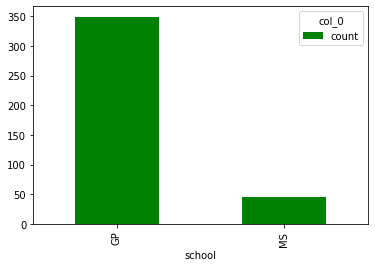

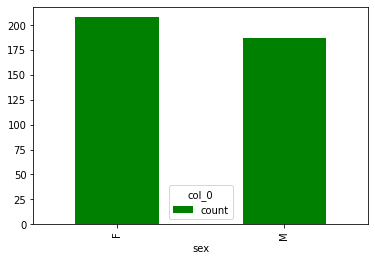

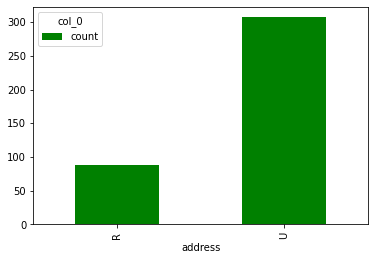

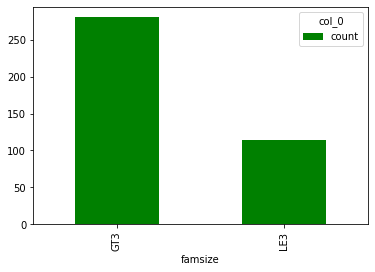

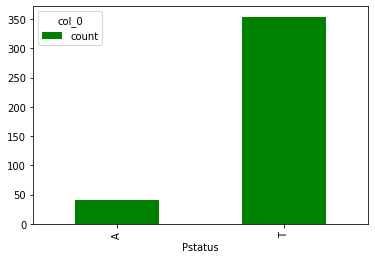

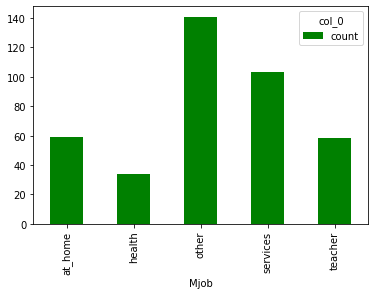

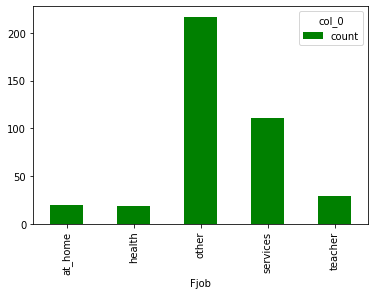

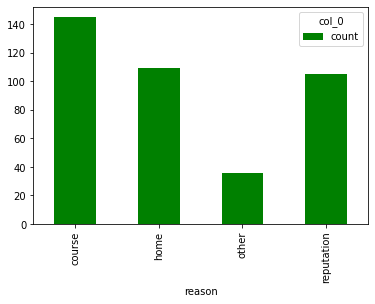

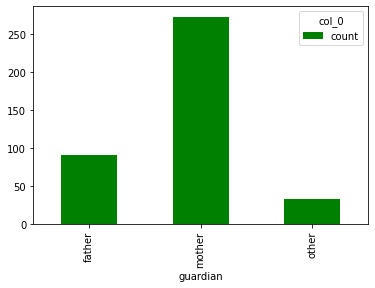

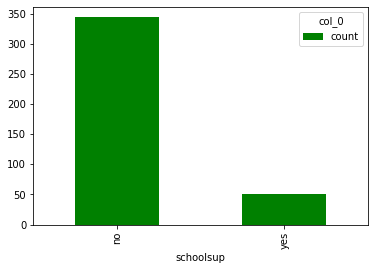

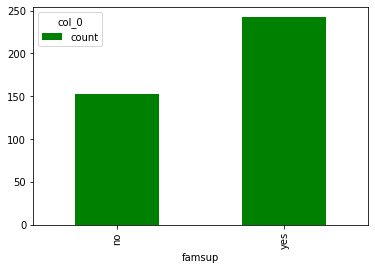

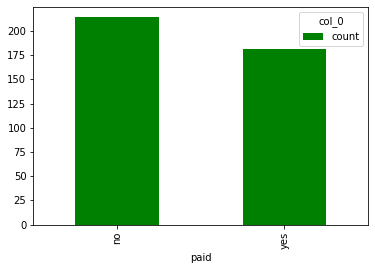

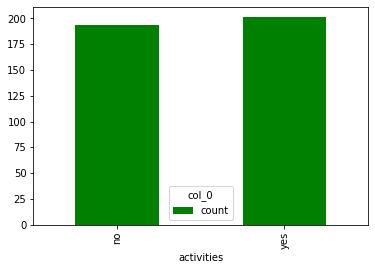

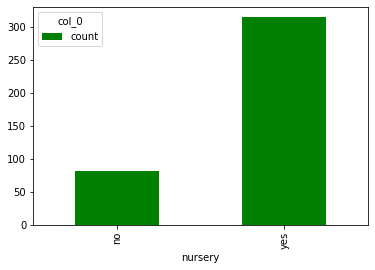

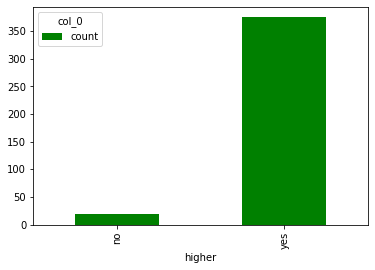

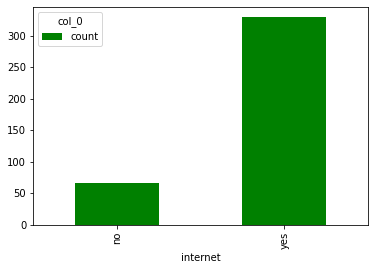

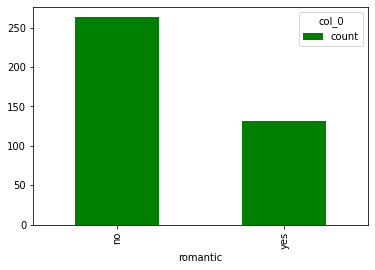

In [88]:
for i in data.select_dtypes(['object']).columns:
    tb = pd.crosstab(index = data[i], columns="count")     
    tb.plot.bar(color='g')

In [89]:
col= data.corr()
colSort = col.abs().unstack()
colSort.sort_values(ascending = False)

age       age         1.000000
Medu      Medu        1.000000
G2        G2          1.000000
G1        G1          1.000000
absences  absences    1.000000
                        ...   
Medu      famrel      0.003914
Fedu      Dalc        0.002386
Dalc      Fedu        0.002386
Fedu      famrel      0.001370
famrel    Fedu        0.001370
Length: 256, dtype: float64

In [90]:
#convert G3 to 5 grade classes A,B,C,D,F
grade = []
for i in data['G3'].values:
    if i in range(0,8):
        grade.append('F')
    elif i in range(8,10):
        grade.append('D')
    elif i in range(10,12):
        grade.append('C')
    elif i in range(12,14):
        grade.append('B')
    else:
        grade.append("A")

dataCopy = data
se = pd.Series(grade)
dataCopy['Grade'] = se.values
dataCopy.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,A
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,C
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,F
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,A
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,A


In [91]:
# checking if there is non unique columns
dataCopy.apply(pd.Series.nunique)

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
Grade          5
dtype: int64

In [92]:
dataCopy.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,A
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,C
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,F
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,A
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,A


In [93]:
data_G3 =  dataCopy.drop(['G3'], axis=1)
data_G3.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,C
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,A
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,C
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,F
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,A
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,A


In [94]:
#Create data frames for input and output variables
Y = data_G3.filter(["Grade"],axis=1)
X = data_G3.drop(['Grade'],axis=1)

In [95]:
#split the datasets into train and test
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.15)

In [96]:
#Perform encoding
x_train = pd.get_dummies(xTrain)
x_test = pd.get_dummies(xTest)
y_train  = pd.get_dummies(yTrain)
y_test  = pd.get_dummies(yTest)

In [97]:
#model with below configuration.
model = Sequential()
model.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001),input_shape = (58,)))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(5,  kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history  = model.fit(x_train,y_train, epochs = 200, batch_size = 5, validation_data = (x_test,y_test))
model.save('model.h5')

Epoch 1/200
67/67 [==============================] - 2s 12ms/step - loss: 1.5857 - accuracy: 0.4060 - val_loss: 1.2979 - val_accuracy: 0.4500
Epoch 2/200
67/67 [==============================] - 0s 3ms/step - loss: 1.0809 - accuracy: 0.6090 - val_loss: 1.0604 - val_accuracy: 0.4833
Epoch 3/200
67/67 [==============================] - 0s 3ms/step - loss: 0.9389 - accuracy: 0.6597 - val_loss: 0.9470 - val_accuracy: 0.6500
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 0.8673 - accuracy: 0.6806 - val_loss: 0.8683 - val_accuracy: 0.6667
Epoch 5/200
67/67 [==============================] - 0s 2ms/step - loss: 0.7663 - accuracy: 0.7134 - val_loss: 0.8690 - val_accuracy: 0.6833
Epoch 6/200
67/67 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.7313 - val_loss: 0.9450 - val_accuracy: 0.6167
Epoch 7/200
67/67 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.7493 - val_loss: 0.8441 - val_accuracy: 0.6167
Epoch 8/200


In [98]:
#Load the saved model and predict the accuracy
model1 = load_model('model.h5')
model1.summary()
results = model1.evaluate(x_test,y_test)
print("Accuracy of the Model %.2f%%" % ( results[1]*100))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                3776      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 5)                 165       
                                                                 
Total params: 10,181
Trainable params: 10,181
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 1.3265 - accuracy: 0.6500
Accuracy of the Model 65.00%


In [99]:
import itertools
def plot_confusion_matrix(ca, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
  
#This function prints and plots the confusion matrix.Normalization can be applied by setting `normalize=True`.
    if normalize:
        ca = ca.astype('float') / ca.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(ca)

    plt.imshow(ca, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = ca.max() / 2.
    for i, j in itertools.product(range(ca.shape[0]), range(ca.shape[1])):
        plt.text(j, i, format(ca[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if ca[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
#Predict Y values
y_predicted = model1.predict(x_test)

#Convert y_test dataframe to letter grades
test_Y = []
for i in y_test.values:
    if i[4].round() ==1:
        test_Y.append('F')
    elif i[3].round() ==1:
        test_Y.append('D')
    elif i[2].round() == 1:
        test_Y.append('C')
    elif i[1].round() ==1:
        test_Y.append('B')
    elif i[0].round() ==1:
        test_Y.append('A')
 
#convert y_predicted dataframe to letter grades
predicted_Y1 = []

for i in y_predicted:
    if i[4].round() == 1:
        predicted_Y1.append('F')
    elif i[3].round() ==1:
        predicted_Y1.append('D')
    elif i[2].round() == 1:
        predicted_Y1.append('C')
    elif i[1].round() ==1:
        predicted_Y1.append('B')
    else:
        predicted_Y1.append('A')

Confusion matrix
[[12  4  1  0  0]
 [ 2  3  1  0  0]
 [ 0  0 13  3  0]
 [ 0  0  4  4  5]
 [ 1  0  0  1  6]]


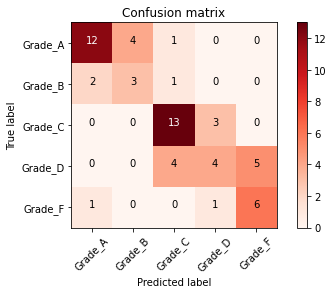

In [102]:
names = ["Grade_A", "Grade_B", "Grade_C","Grade_D","Grade_F"]
cm = confusion_matrix(test_Y, predicted_Y1,labels=["A", "B", "C","D","F"])
plt.figure()
plot_confusion_matrix(cm, classes=names, title='Confusion matrix')

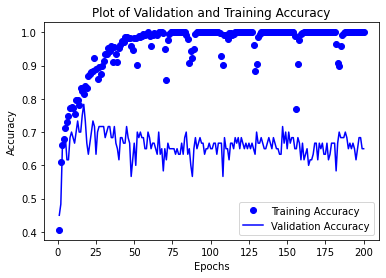

In [103]:
#Plot training accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Plot of Validation and Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

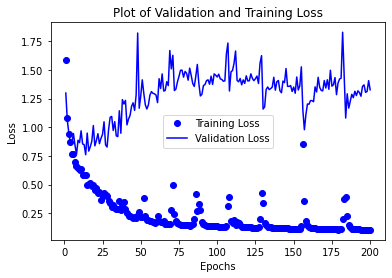

In [104]:
#Plot training loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Plot of Validation and Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()